                                        Exploratory Data Analysis                                                  

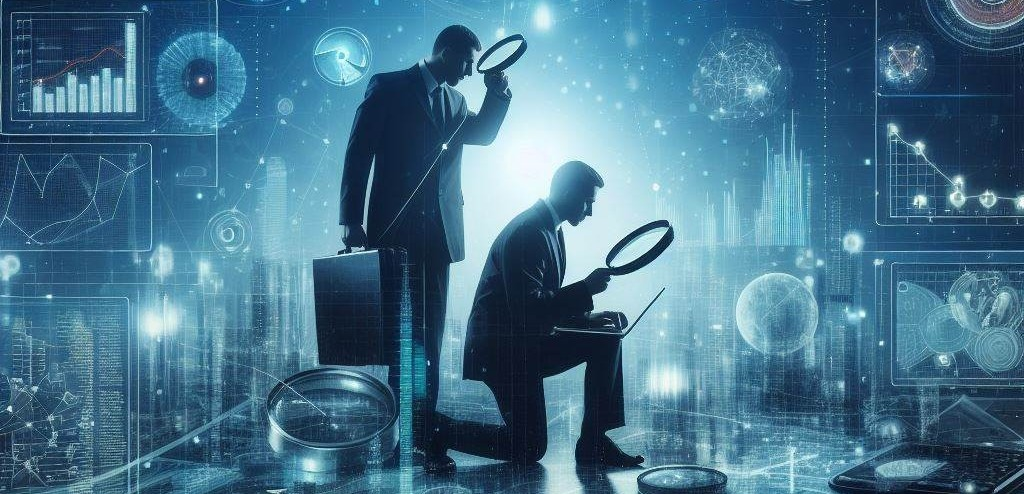

Ya con el dataframe definido, podemos empezar el proceso denominado EDA (Análisis Exploratorio de Datos), con el que podremos observar y graficar los datos para empezar a entenderlos mejor.

In [1]:
# Importamos las librerías necesarias para este proceso de ETL
import pandas as pd # Librería de manipulación y análisis de datos.
import numpy as np # Librería fundamental para la computación científica en Python. 
import matplotlib.pyplot as plt # Librería para crear visualizaciones y gráficos en Python.
import seaborn as sns # Librería para crear gráficos estadísticos e informativos.
import funciones # De funciones.py, donde se encuentran las funciones que utilizaremos en este Python.


                        Recordamos la información del Dataframe df_siniestros_viales                                 

In [2]:
# Creamos un nuevo dataframe con los datos de nuestro .csv
df_siniestros_viales = pd.read_csv(r'Datasets\df_siniestros_viales.csv')

In [3]:
# Con nuestra función, vemos los datos finales de nuestro Dataframe
print(funciones.verificar_tipo_datos(df_siniestros_viales))
print(df_siniestros_viales.shape)

     nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0              ID  [<class 'str'>]       100.0      0.0      0
1      N_VICTIMAS  [<class 'int'>]       100.0      0.0      0
2   TIPO_DE_CALLE  [<class 'str'>]       100.0      0.0      0
3          COMUNA  [<class 'int'>]       100.0      0.0      0
4           pos x  [<class 'str'>]       100.0      0.0      0
5           pos y  [<class 'str'>]       100.0      0.0      0
6   PARTICIPANTES  [<class 'str'>]       100.0      0.0      0
7         VICTIMA  [<class 'str'>]       100.0      0.0      0
8         ACUSADO  [<class 'str'>]       100.0      0.0      0
9           FECHA  [<class 'str'>]       100.0      0.0      0
10    ROL_VICTIMA  [<class 'str'>]       100.0      0.0      0
11           SEXO  [<class 'str'>]       100.0      0.0      0
12           EDAD  [<class 'str'>]       100.0      0.0      0
(717, 13)


Este conjunto de datos contiene información sobre los Hechos y las Victimas de siniestros viales en la Ciudad Autónoma de Buenos Aires. Consta de 13 columnas y 717 filas, no posee valores nulos, ni filas duplicadas. A continuación se detallan las columnas:

🚑 N_VICTIMAS: Cantidad de personas que participaron del siniestro vial.

🛣️ TIPO_DE_CALLE: Tipo de pavimento donde ocurrió el hecho.

🏘️ COMUNA: Comuna de la ciudad donde ocurrió el hecho. (Unidades político administrativas en las que se divide la Ciudad Autónoma de Buenos Aires)

🗺️ pos x: Longitud con separador punto. WGS84

🗺️ pos y: Latitud con separador punto. WGS84

👥 PARTICIPANTES: Conjunción de víctima y acusado.

🚗 VICTIMA: Vehículo que ocupaba quien haya fallecido o se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.

🚓 ACUSADO: Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal.

📅 FECHA: Fecha en que ocurrió el hecho, en formato YYYY-MM-DD.

🚑 ROL_VICTIMA: Rol que ocupaba la víctima del siniestro.

🧑 SEXO: Sexo informado por fuente policial de la víctima.

🎂 EDAD: Edad de la víctima al momento del siniestro.

Este resumen proporciona una visión general de la estructura y el contenido del DataFrame 📊🏞️

Ahora que nuestro Dataframe tiene las columnas y filas necesarias, podemos empezar a analizar detalladamente qué información nos proporciona.

In [4]:
# Convertir la columna 'FECHA' a datetime
df_siniestros_viales['FECHA'] = pd.to_datetime(df_siniestros_viales['FECHA'])

# Extraer el año y el mes en nuevas columnas
df_siniestros_viales['Año'] = df_siniestros_viales['FECHA'].dt.year
df_siniestros_viales['Mes'] = df_siniestros_viales['FECHA'].dt.month

# Agrupar por año y mes, sumar el número de víctimas y crear un nuevo DataFrame
df_nuevo = df_siniestros_viales.groupby(['Año', 'Mes']).agg({'N_VICTIMAS': 'sum'}).reset_index()

# Pivotar la tabla para obtener un DataFrame con la estructura deseada
df_pivotado = df_nuevo.pivot(index='Año', columns='Mes', values='N_VICTIMAS').reset_index()

# Renombrar las columnas de los meses
nombres_meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df_pivotado = df_pivotado.rename(columns=nombres_meses)

# Calcular la columna 'Total' y agregarla al DataFrame
df_pivotado['Total'] = df_pivotado.iloc[:, 1:].sum(axis=1)

# Reordenar las columnas para que 'Total' esté al final
columnas_ordenadas = ['Año'] + list(nombres_meses.values()) + ['Total']
df_final = df_pivotado[columnas_ordenadas]

# Mostrar el nuevo DataFrame
print(df_final)

Mes   Año  Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0    2016      8       12     15     11     7     14     11      13   
1    2017     10       13     20     11    18      9     12       9   
2    2018     14       13     10     17    10     12     14      18   
3    2019      9       10     11      9     9     11      5      14   
4    2020      8        8      5      3     4      3      2       8   
5    2021     13        9      7      5    12      9      7       9   

Mes  Septiembre  Octubre  Noviembre  Diciembre  Total  
0            14       12         14         19    150  
1            17       13         14         14    160  
2            10       12         17         14    161  
3             9        6          8          5    106  
4             5        6          9         26     87  
5             4        5          8          9     97  


                        Graficamos la información del Dataframe df_siniestros_viales                                 

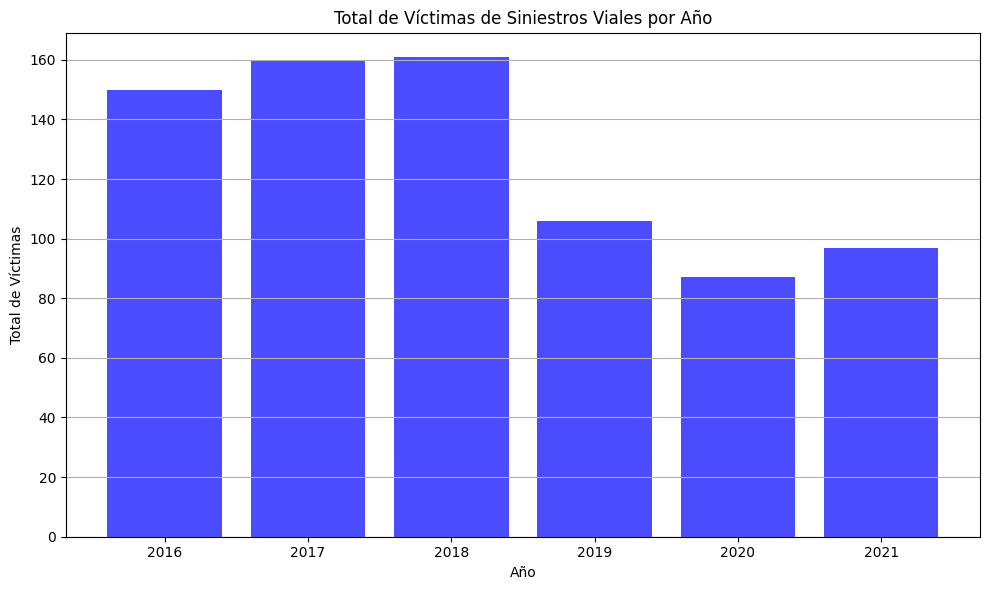

In [5]:
# Datos
años = df_final['Año']
total = df_final['Total']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(años, total, color='blue', alpha=0.7)  # Barras
plt.title('Total de Víctimas de Siniestros Viales por Año')
plt.xlabel('Año')
plt.ylabel('Total de Víctimas')
plt.grid(axis='y')  # Activar cuadrícula solo en el eje y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

Como primer análisis, creamos un gráfico de barras sencillo que permita visualizar la cantidad de víctimas por Siniestros Viales en la Ciudad Autónoma de Buenos Aires. Se producen varias conclusiones:
* 2020 tiene la menor cantidad de víctimas de este período. (Año atravesado por pandemia)
* 2018 tiene la mayor cantidad de víctimas en este período, y además, es el único año que tiene más víctimas que su año anterior.
* 2019 tiene una gran baja en cuanto al año 2018, con casi un 30% menos de víctimas.
* 2021 vuelve a normalizar la cantidad de víctimas si se compara con el último año pre-pandémico (2019), pero sigue estando casi un 30% debajo de los años anteriores (2018-2016)

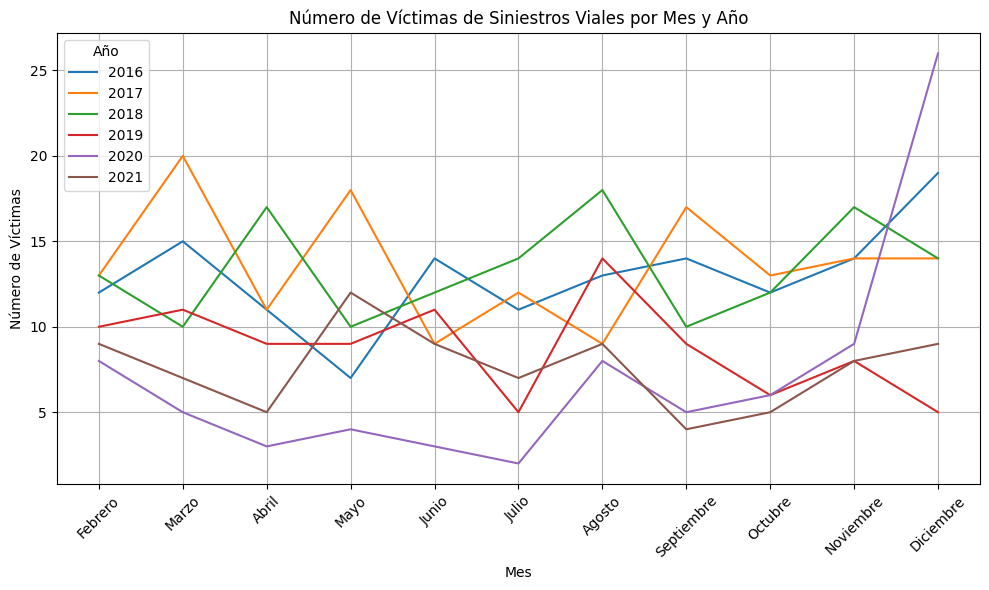

In [6]:
# Datos
años = df_final['Año']
meses = list(df_final.columns)[2:-1]  # Excluir las columnas 'Año' y 'Total'

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
for i in range(len(años)):
    plt.plot(meses, df_final.iloc[i, 2:-1], label=str(años[i]))

# Personalización del gráfico
plt.title('Número de Víctimas de Siniestros Viales por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.legend(title='Año')
plt.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

Podemos continuar el análisis haciendo foco en el año 2020, con un nuevo gráfico que nos indique mes a mes lo sucedido.

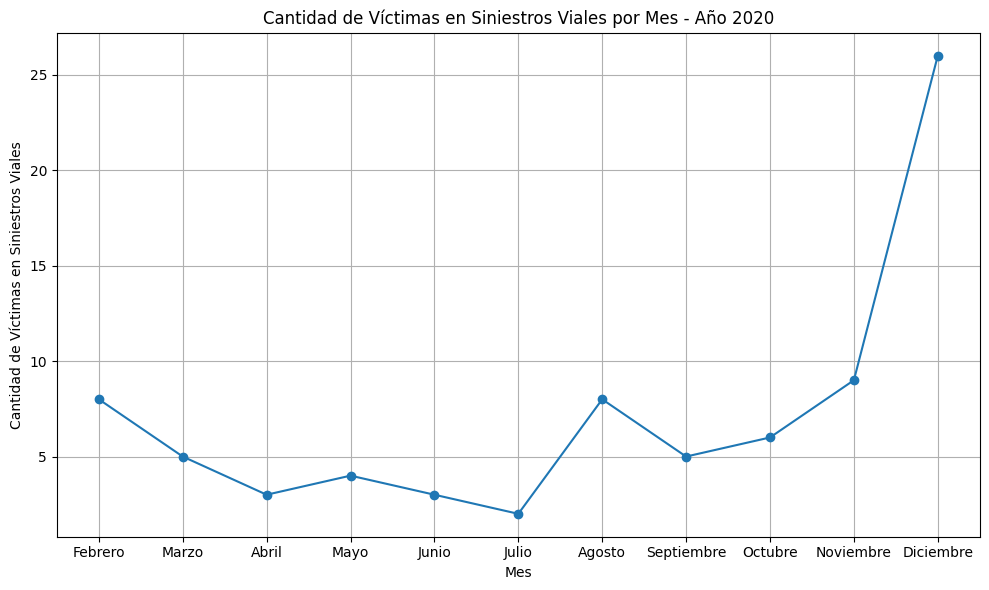

In [7]:
# Filtrar los datos solo para el año 2020
datos_2020 = df_final[df_final['Año'] == 2020]

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(datos_2020.columns[2:-1], datos_2020.iloc[0, 2:-1], marker='o', linestyle='-')

# Agregar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad de Víctimas en Siniestros Viales')
plt.title('Cantidad de Víctimas en Siniestros Viales por Mes - Año 2020')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

Como indica el gráfico, el año 2020 fue un año muy errático. Es imposible medirlo con los mismos criterios que al resto de años por la situación que vivió el país. El 20 de Marzo de 2020, el ex-presidente Alberto Fernández, haría uso del Decreto de Necesidad y Urgencia, para comenzar una cuarentena obligatoria que duraría. Para comparar nuestros datos, hago uso del análisis realizado por la Dirección Nacional de Epidemiología e Información Estratégica con datos extraídos del SNVS 2.0.



![Captura de pantalla_21-4-2024_16214_www.argentina.gob.ar.jpeg](<attachment:Captura de pantalla_21-4-2024_16214_www.argentina.gob.ar.jpeg>)

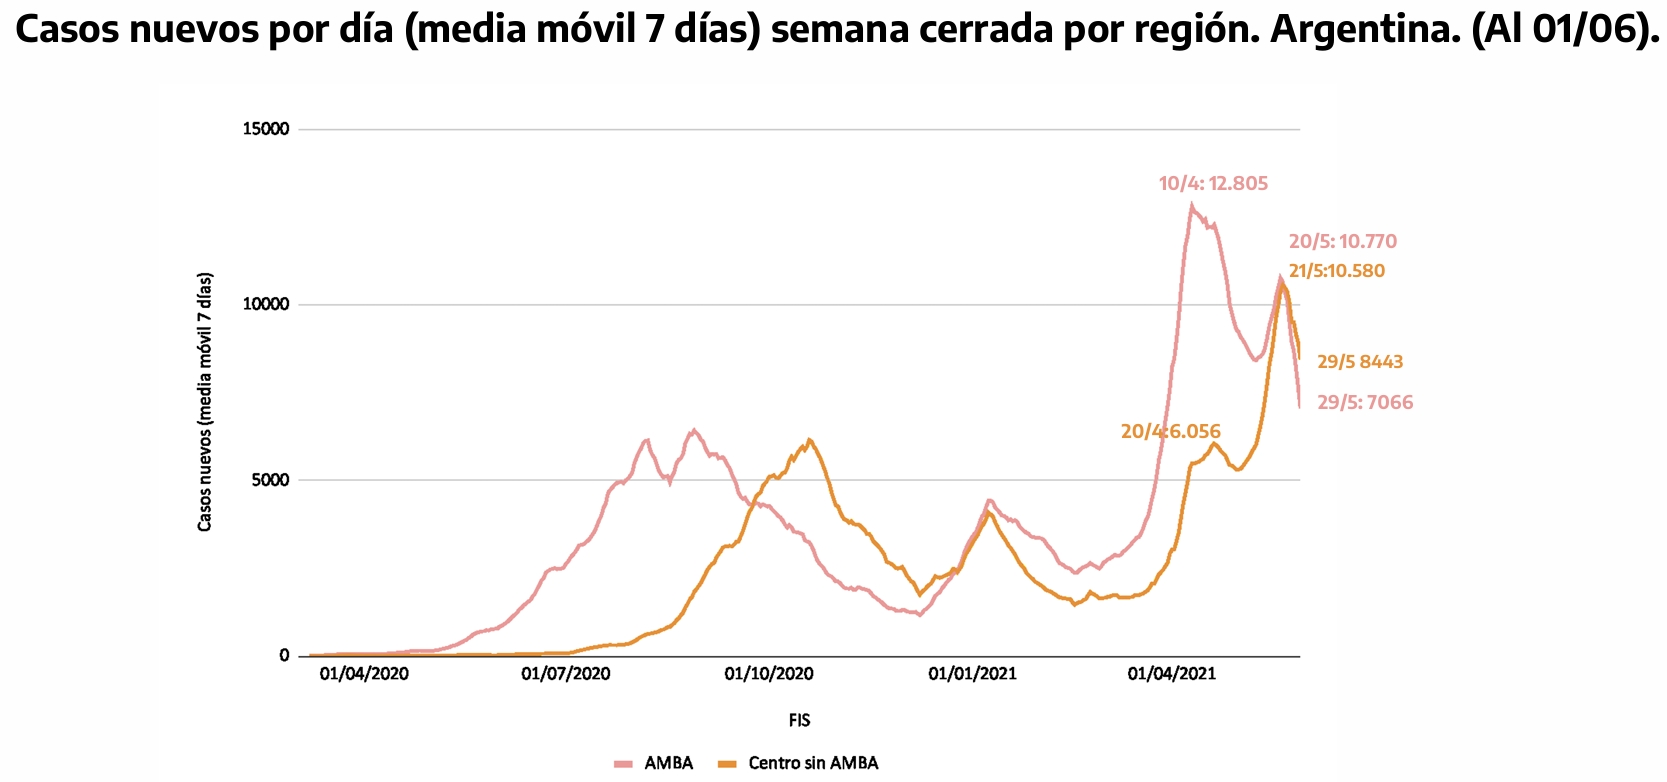

Así, podemos confirmar que, en 2020, a medida que los casos de COVID-19 aumentaban, los siniestros viales disminuían. El AMBA fue una de las zonas más afectadas por su cantidad de habitantes, asi como tambien fue una de las zonas que más tiempo estuvo en cuarentena estricta. Hasta Octubre, que como podemos ver en nuestro gráfico, los siniestro viales vuelven a aumentar. Para ver cómo este gráfico por meses se compara con el resto de años en nuestro análisis, podemos hacer lo siguiente:

                        Agregamos más data al Dataframe df_siniestros_viales                                 

Para realizar el análisis del primer KPi, necesitamos más información. Sobre todo, necesitamos saber la población de CABA en los años 2016-2021. Para ello, traeremos un nuevo dataframe obtenido en la página gubernamental INDEC. Con la cual podremos calcular la tasa de homicidios en siniestros viales. (Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000)

In [8]:
# Ruta del archivo Excel
ruta_archivo = (r'Datasets\c2022_caba_est_c1_1.xlsx')

# Leer el archivo Excel y seleccionar la hoja "Cuadro 1.1"
df_comunas_excel = pd.read_excel(ruta_archivo, sheet_name='Cuadro 1.1', skiprows=2)

# Seleccionar únicamente las columnas necesarias
df_poblacion_comunas = df_comunas_excel[['Comuna', 'Poblacion 2010', 'Poblacion 2022', 'Variacion_Absoluta', 'Variacion_relativa']]
df_poblacion_comunas = df_poblacion_comunas.dropna()

# Mostrar el DataFrame resultante
print(df_poblacion_comunas)

       Comuna  Poblacion 2010  Poblacion 2022  Variacion_Absoluta  \
0       Total       2890151.0       3121707.0            231556.0   
1    Comuna 1        205886.0        223554.0             17668.0   
2    Comuna 2        157932.0        161645.0              3713.0   
3    Comuna 3        187537.0        196240.0              8703.0   
4    Comuna 4        218245.0        229240.0             10995.0   
5    Comuna 5        179005.0        194271.0             15266.0   
6    Comuna 6        176076.0        203043.0             26967.0   
7    Comuna 7        220591.0        215896.0             -4695.0   
8    Comuna 8        187237.0        204367.0             17130.0   
9    Comuna 9        161797.0        169063.0              7266.0   
10  Comuna 10        166022.0        173004.0              6982.0   
11  Comuna 11        189832.0        204601.0             14769.0   
12  Comuna 12        200116.0        236887.0             36771.0   
13  Comuna 13        231331.0     

Con este nuevo dataframe, podemos entender la variación en la tasa de homicidios por siniestros viales. Ahora, voy a limpiar un poco los datos para mejorar la usabilidad de este dataframe.

In [9]:
# Eliminar la palabra 'Comuna' de la columna 'Comuna' y convertir el resto a tipo int
df_poblacion_comunas['Comuna'] = df_poblacion_comunas['Comuna'].str.replace('Comuna ', '')

# Cambiar 'Total' por 0 en la columna 'Comuna'
df_poblacion_comunas['Comuna'] = df_poblacion_comunas['Comuna'].replace('Total', 0).astype(int)

# Verificar el resultado
print(df_poblacion_comunas)


    Comuna  Poblacion 2010  Poblacion 2022  Variacion_Absoluta  \
0        0       2890151.0       3121707.0            231556.0   
1        1        205886.0        223554.0             17668.0   
2        2        157932.0        161645.0              3713.0   
3        3        187537.0        196240.0              8703.0   
4        4        218245.0        229240.0             10995.0   
5        5        179005.0        194271.0             15266.0   
6        6        176076.0        203043.0             26967.0   
7        7        220591.0        215896.0             -4695.0   
8        8        187237.0        204367.0             17130.0   
9        9        161797.0        169063.0              7266.0   
10      10        166022.0        173004.0              6982.0   
11      11        189832.0        204601.0             14769.0   
12      12        200116.0        236887.0             36771.0   
13      13        231331.0        264385.0             33054.0   
14      14

Para definir la tasa de homicidios, debemos comparar los datos de nuestro dataframe con el total de víctimas en siniestros viales, dividirlo por el dato más reciente de la población disponible (El Censo 2022) y luego multiplicar por 100000

In [10]:
# Obtener el total de población de 2022
poblacion_2022 = df_poblacion_comunas.loc[0, 'Poblacion 2022']

# Crear el nuevo DataFrame con las columnas requeridas
df_tasa_homicidios = pd.DataFrame({
    'Año': df_final['Año'],
    'Total_Siniestros': df_final['Total'],
    'Poblacion_2022': poblacion_2022,
})

# Calcular la tasa de homicidios y agregarla al DataFrame
df_tasa_homicidios['Tasa_Homicidios'] = (df_final['Total'] / poblacion_2022) * 100000

# Mostrar el nuevo DataFrame
print(df_tasa_homicidios)


    Año  Total_Siniestros  Poblacion_2022  Tasa_Homicidios
0  2016               150       3121707.0         4.805063
1  2017               160       3121707.0         5.125401
2  2018               161       3121707.0         5.157435
3  2019               106       3121707.0         3.395578
4  2020                87       3121707.0         2.786937
5  2021                97       3121707.0         3.107274


Ahora, podremos graficar esta información para compararla con los gráficos anteriores.

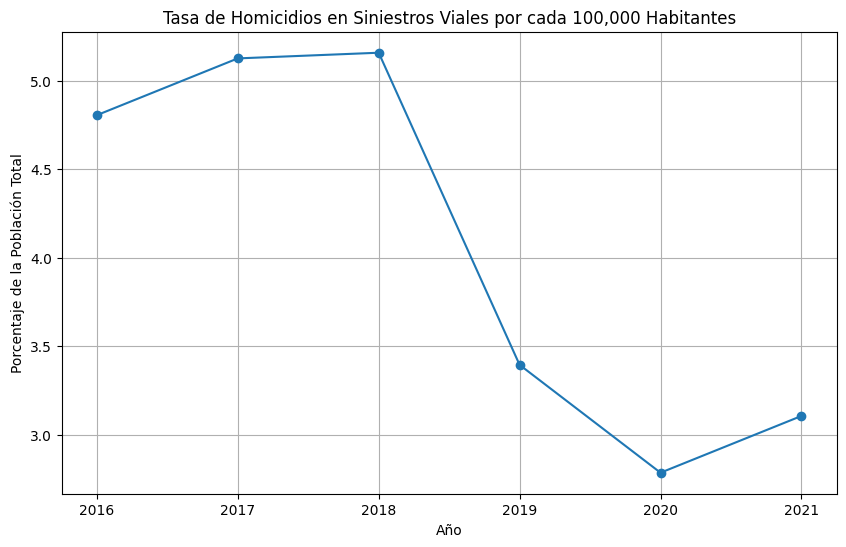

In [11]:

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_tasa_homicidios['Año'], df_tasa_homicidios['Tasa_Homicidios'], marker='o', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Tasa de Homicidios en Siniestros Viales por cada 100,000 Habitantes')
plt.xlabel('Año')
plt.ylabel('Porcentaje de la Población Total')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

Para continuar el EDA, me gustaría mostrar cómo varía este gráfico por cada comuna. 

In [12]:
# Agrupar los datos por año y comuna y sumar el número de víctimas
df_siniestros_comunas = df_siniestros_viales.groupby(['Año', 'COMUNA'])['N_VICTIMAS'].sum().reset_index()

Para ello, cree un pequeño nuevo dataframe donde se agrupe la cantidad de víctimas por comuna. Teniendo el valor 0 los siniestros viales que no corresponden a ninguna comuna.

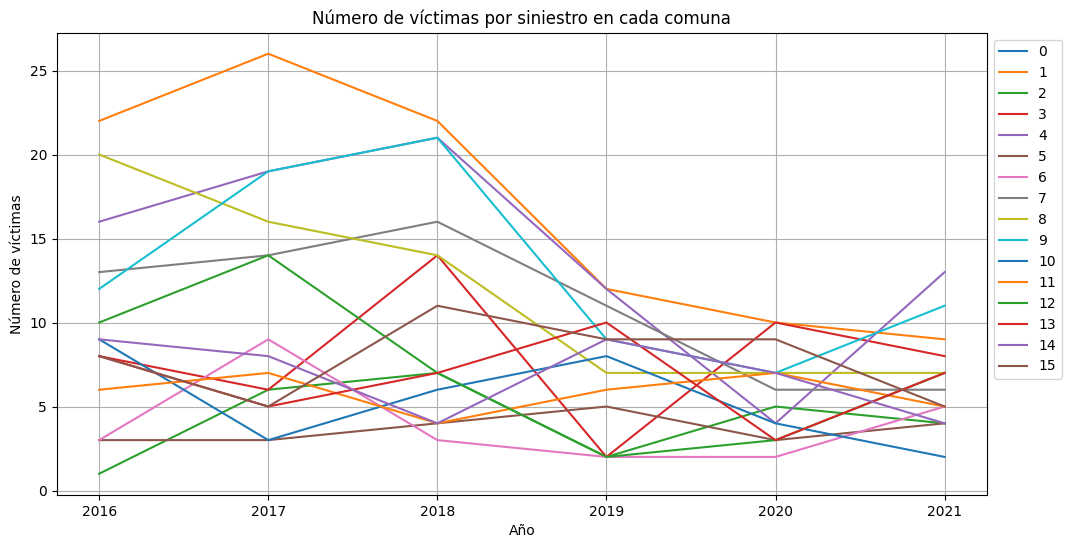

In [13]:
# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Iterar sobre cada comuna y graficar el número de víctimas por año
for comuna in df_siniestros_comunas['COMUNA'].unique():
    data_comuna = df_siniestros_comunas[df_siniestros_comunas['COMUNA'] == comuna]
    plt.plot(data_comuna['Año'], data_comuna['N_VICTIMAS'], label=comuna)

# Configurar el título y etiquetas de los ejes
plt.title('Número de víctimas por siniestro en cada comuna')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Mostrar leyenda fuera del gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()

Si bien es un gráfico útil, no creo que sea la mejor manera de entender estos valores. Por lo cual, recurro a utilizar la librería plotly

In [14]:
import plotly.express as px

# Suponiendo que ya tienes cargado tu dataframe df_siniestros_comunas

fig = px.area(df_siniestros_comunas, x='Año', y='N_VICTIMAS', color='COMUNA',
              title='Número de víctimas por siniestro en cada comuna',
              labels={'Año': 'Año', 'N_VICTIMAS': 'Número de víctimas'})

fig.update_layout(legend=dict(title='Comuna', yanchor="top", y=0.99, xanchor="left", x=0.01))

# Guardar el gráfico como un archivo HTML
fig.write_html("grafico_siniestros_comunas.html")

![Siniestros por comuna](Imagenes\siniestros_por_comuna.jpeg)


Ahora si, tenemos un gráfico que nos permite ver la variación de los datos en cada comuna:
* La comuna 1 es la más afectada año tras año.
* La comuna 15 es la que manteniene el promedio de siniestros viales más parejo.
* La comuna 4 y 9 tienen siniestros muy parecidos hasta el año 2020.
* Todas las comunas redujeron su cantidad de siniestros viales desde el año 2018 al año 2019.

Con toda esta información, y constatándola con la información proporcionada por el Ministerio de el ex-gobernador de CABA Rodríguez Larreta, se puede concluir que no existe un error en el dataset entre los años 2018 y 2019. Por lo tanto, se puede seguir con el análisis tranquilamente.

In [15]:
# Paso 1: Calcular la sumatoria de siniestros viales por semestre para cada año
for año in df_final['Año'].unique():
    # Primer semestre
    primer_semestre = df_final[(df_final['Año'] == año)][['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']].sum(axis=1)
    df_final.loc[df_final['Año'] == año, 'Suma_Primer_Semestre'] = primer_semestre.sum()
    # Segundo semestre
    segundo_semestre = df_final[(df_final['Año'] == año)][['Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
    df_final.loc[df_final['Año'] == año, 'Suma_Segundo_Semestre'] = segundo_semestre.sum()

# Paso 2: Calcular la tasa de homicidios en siniestros viales para cada semestre
for año in df_final['Año'].unique():
    # Primer semestre
    total_siniestros_primer_semestre = df_final.loc[df_final['Año'] == año, 'Suma_Primer_Semestre'].iloc[0]
    poblacion_año = df_tasa_homicidios.loc[df_tasa_homicidios['Año'] == año, 'Poblacion_2022'].iloc[0]
    tasa_primer_semestre = (total_siniestros_primer_semestre / poblacion_año) * 100000
    df_final.loc[df_final['Año'] == año, 'Tasa_Primer_Semestre'] = tasa_primer_semestre
    
    # Segundo semestre
    total_siniestros_segundo_semestre = df_final.loc[df_final['Año'] == año, 'Suma_Segundo_Semestre'].iloc[0]
    tasa_segundo_semestre = (total_siniestros_segundo_semestre / poblacion_año) * 100000
    df_final.loc[df_final['Año'] == año, 'Tasa_Segundo_Semestre'] = tasa_segundo_semestre

# Paso 3: Mostrar el DataFrame con las nuevas columnas
print(df_final)




Mes   Año  Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0    2016      8       12     15     11     7     14     11      13   
1    2017     10       13     20     11    18      9     12       9   
2    2018     14       13     10     17    10     12     14      18   
3    2019      9       10     11      9     9     11      5      14   
4    2020      8        8      5      3     4      3      2       8   
5    2021     13        9      7      5    12      9      7       9   

Mes  Septiembre  Octubre  Noviembre  Diciembre  Total  Suma_Primer_Semestre  \
0            14       12         14         19    150                  67.0   
1            17       13         14         14    160                  81.0   
2            10       12         17         14    161                  76.0   
3             9        6          8          5    106                  59.0   
4             5        6          9         26     87                  31.0   
5             4        5    

Ahora, podemos graficar que se cumple el primer KPI, y los siniestros viales se redujeron un 10% en el último semestre de nuestros datos. 

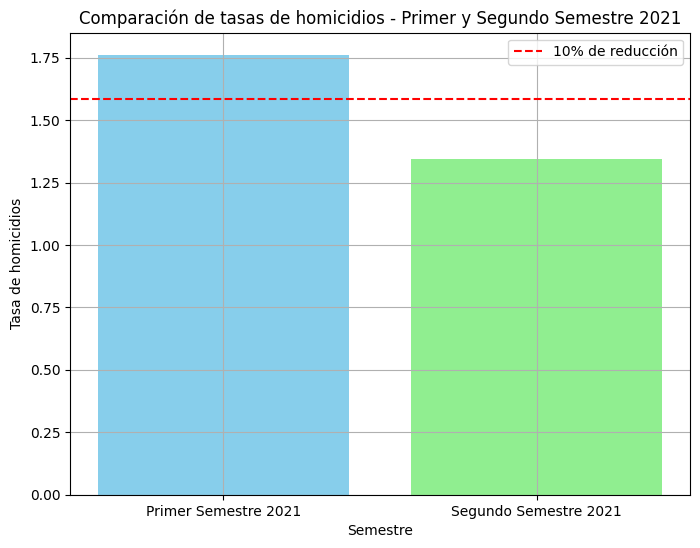

In [16]:
# Datos de las tasas de homicidios del segundo semestre de 2021 y del primer semestre del 2021
tasa_primer_semestre_2021 = 1.761857  # Tasa del primer semestre del 2021
tasa_segundo_semestre_2021 = 1.345418  # Tasa del segundo semestre del 2021

# Calcular la reducción del 10%
reduccion_10 = tasa_primer_semestre_2021 * 0.9

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Primer Semestre 2021', 'Segundo Semestre 2021'], [tasa_primer_semestre_2021, tasa_segundo_semestre_2021], color=['skyblue', 'lightgreen'])
plt.axhline(reduccion_10, color='red', linestyle='--', label='10% de reducción')

# Etiquetas y título
plt.xlabel('Semestre')
plt.ylabel('Tasa de homicidios')
plt.title('Comparación de tasas de homicidios - Primer y Segundo Semestre 2021')
plt.legend()
plt.grid(True)
plt.show()

Ahora, podemos continuar desmenuzando nuestros datos hasta llegar al segundo KPi

                                                  Continuamos el EDA                                 

Con el primer KPI resuelto, podemos avanzar hacia nuevos horizontes gracias a los datos que ya tenemos guardados. Por ejemplo, podemos graficar las edades de las víctimas de los siniestros viales, y su género.

C:\Users\loren\AppData\Local\Temp\ipykernel_14616\3731654292.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



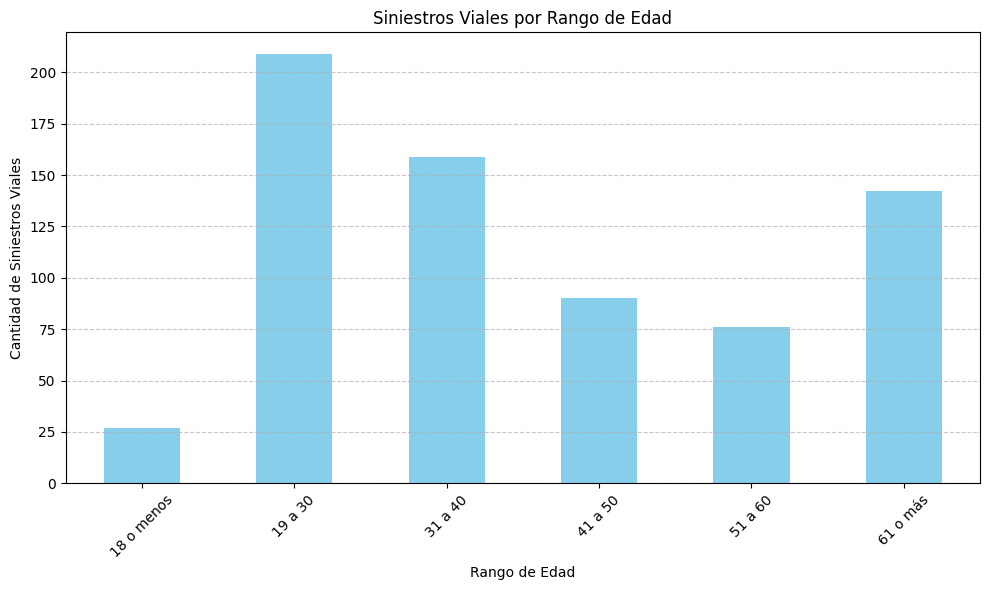

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_siniestros_viales es tu DataFrame con las columnas 'N_VICTIMAS' y 'EDAD'

# Convertir la columna 'EDAD' a valores numéricos
df_siniestros_viales['EDAD'] = pd.to_numeric(df_siniestros_viales['EDAD'], errors='coerce')

# Definir los rangos de edad
rangos_edad = ['18 o menos', '19 a 30', '31 a 40', '41 a 50', '51 a 60', '61 o más']

# Definir los límites de edad para cada rango
limites_edad = [0, 18, 30, 40, 50, 60, float('inf')]

# Agrupar las edades en los rangos definidos
df_siniestros_viales['Rango_Edad'] = pd.cut(df_siniestros_viales['EDAD'], bins=limites_edad, labels=rangos_edad, right=False)

# Contar la cantidad de siniestros por cada rango de edad
siniestros_por_edad = df_siniestros_viales.groupby('Rango_Edad')['N_VICTIMAS'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
siniestros_por_edad.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Siniestros Viales')
plt.title('Siniestros Viales por Rango de Edad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


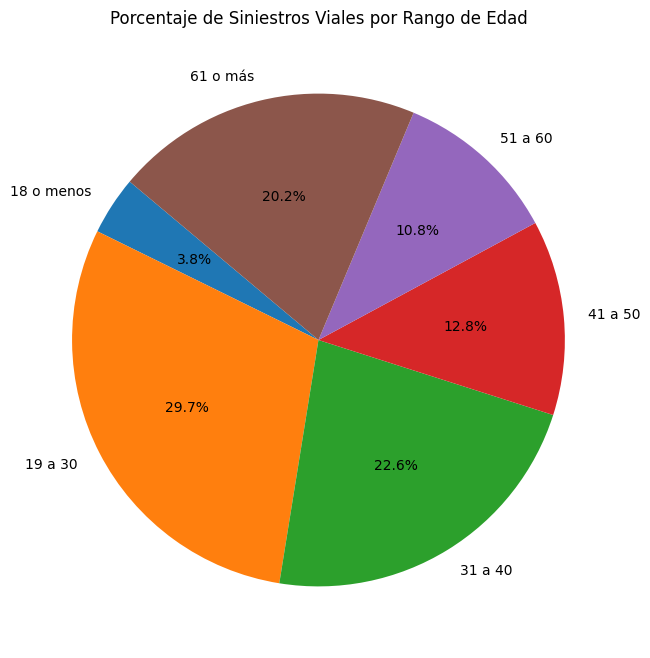

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(siniestros_por_edad, labels=siniestros_por_edad.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Siniestros Viales por Rango de Edad')
plt.show()


Para este análisis, me centré en agrupar las edades de las víctimas en varios grupos:
* Menores de 18 años. Adolescentes que todavía no pueden obtener licencias de conducir legalmente. Representan solamente al 3.8% de las víctimas por siniestros viales.
* Entre 19 y 30 años. Jóvenes que manejan vehículos, ya sea motos o autos. Representan al 29.7% de las víctimas.
* De 31 a 40 años. Adultos jóvenes, representan al 22.6% de las víctimas.
* De 41 a 50 años. Adultos, representan al 12.8% de las víctimas
* de 51 a 60 años. Adultos mayores, representan al 10.8% de las víctimas.
* Mayores de 60 años. Jubilados y abuelos, representan al 20.2% de las víctimas.
Con este gráfico, podemos argumentar que la mayor cantidad de siniestros viales, se cobran la vida de personas entre los 19 y los 40 años. Este grupo etáreo representa al 52.3% de las víctimas totales. Seguido de los mayores de 60, con 20.2%

C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1576825467.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



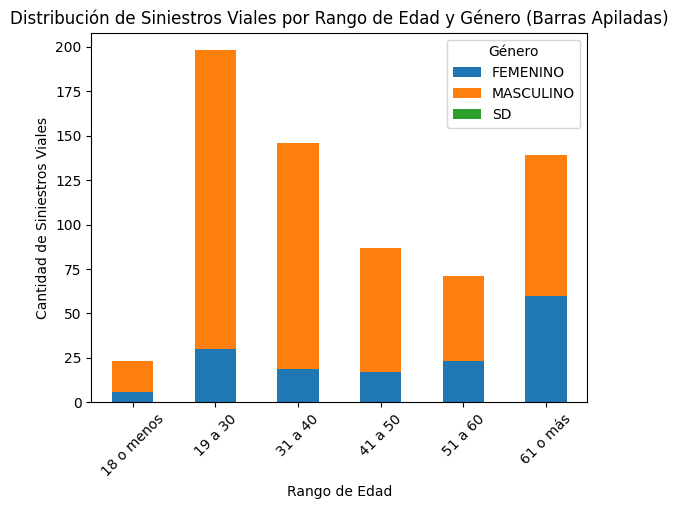

In [19]:
# Crear el gráfico de barras apiladas
df_siniestros_viales.groupby(['Rango_Edad', 'SEXO']).size().unstack().plot(kind='bar', stacked=True)

plt.title('Distribución de Siniestros Viales por Rango de Edad y Género (Barras Apiladas)')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Siniestros Viales')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()


En este gráfico, agregamos a las barras apiladas el dato del Sexo de las víctimas. En ningún rango etáreo las mujeres llegan a significar el 50% de las víctimas. El rango etáreo más parejo es el de 61 años o más. Esto puede deberse a que hay una gran mayoría de hombres manejando vehículos que mujeres en Argentina.

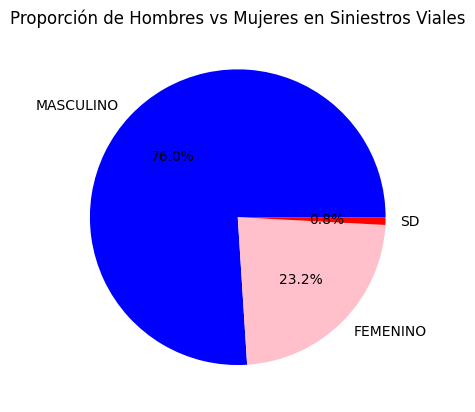

In [20]:
total_victimas = df_siniestros_viales['SEXO'].count()
porcentaje_victimas_por_genero = df_siniestros_viales['SEXO'].value_counts() / total_victimas * 100

# Crear el gráfico de torta
porcentaje_victimas_por_genero.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink', 'red'])

plt.title('Proporción de Hombres vs Mujeres en Siniestros Viales')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()

En su totalidad, las mujeres representan un 23.2% de las víctimas de siniestros viales en la Ciudad Autónoma de Buenos Aires. Ahora, voy a graficar los vehículos en que se transportaban las víctimas de estos siniestros

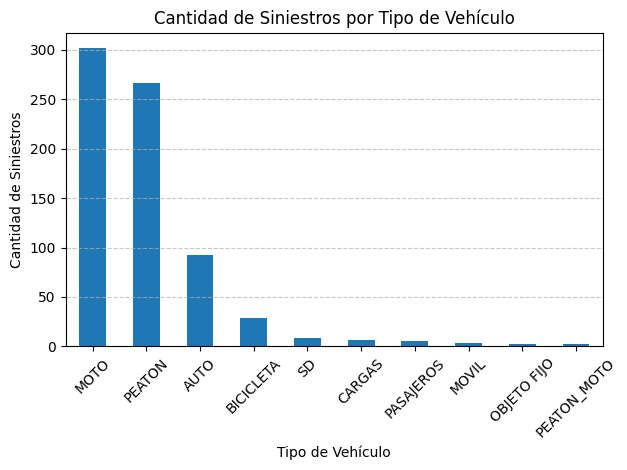

In [21]:
# Contar la cantidad de siniestros por tipo de vehículo
siniestros_por_vehiculo = df_siniestros_viales['VICTIMA'].value_counts()

# Ordenar los tipos de vehículos por la cantidad de siniestros
siniestros_por_vehiculo = siniestros_por_vehiculo.sort_values(ascending=False)

# Crear el gráfico de barras
siniestros_por_vehiculo.plot(kind='bar')

plt.title('Cantidad de Siniestros por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una rejilla horizontal
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()



Como permite ver el gráfico, los más indefensos son los que manejan moto y los peatones, quienes lideran la cantidad de víctimas por siniestros viales. Muy por detrás se encuentran los que manejan automóvil. Seguido por ciclistas y otros vehículos varios. Para un mejor impacto visual, decido agrupar todos estos vehículos varios en una sola categoría.

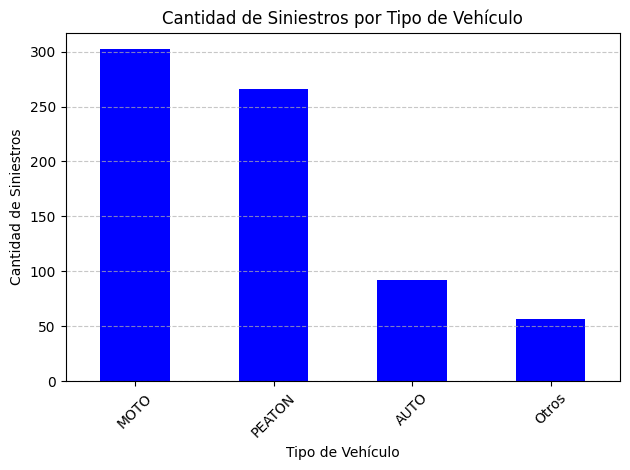

In [22]:
# Contar la cantidad de siniestros por tipo de vehículo
siniestros_por_vehiculo = df_siniestros_viales['VICTIMA'].value_counts()

# Filtrar para incluir solo los tipos de vehículos con al menos 50 víctimas
vehiculos_principales = siniestros_por_vehiculo[siniestros_por_vehiculo >= 50].index

# Agrupar los tipos de vehículos con menos de 50 víctimas bajo la categoría 'Otros'
otros_siniestros = siniestros_por_vehiculo[siniestros_por_vehiculo < 50].sum()
siniestros_por_vehiculo = siniestros_por_vehiculo[siniestros_por_vehiculo >= 50]
siniestros_por_vehiculo['Otros'] = otros_siniestros

# Crear el gráfico de barras
siniestros_por_vehiculo.plot(kind='bar', color='blue')

plt.title('Cantidad de Siniestros por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una rejilla horizontal
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()


Vemos que las motos son un grave factor de riesgo a la hora de elegir en qué vehículo transportarse. Con esta información podemos graficar el segundo KPi.

                                       Graficando el segundo KPI                                 

In [23]:
# Filtrar los datos para incluir solo los siniestros viales que involucraron motociclistas
siniestros_moto = df_siniestros_viales[df_siniestros_viales['VICTIMA'] == 'MOTO']

# Calcular la cantidad de accidentes mortales con víctimas en moto en el año anterior (2020)
accidentes_2020 = siniestros_moto[siniestros_moto['Año'] == 2020]['N_VICTIMAS'].sum()

# Calcular la cantidad de accidentes mortales con víctimas en moto en el último año (2021)
accidentes_2021 = siniestros_moto[siniestros_moto['Año'] == 2021]['N_VICTIMAS'].sum()

# Calcular el porcentaje de reducción
porcentaje_reduccion = ((accidentes_2020 - accidentes_2021) / accidentes_2020) * 100

print("Porcentaje de reducción en la cantidad de accidentes mortales de motociclistas en el último año respecto al año anterior:", porcentaje_reduccion)


Porcentaje de reducción en la cantidad de accidentes mortales de motociclistas en el último año respecto al año anterior: -53.333333333333336


El KPI propuesto por la empresa no se cumple, ya que el último año, los siniestros viales con motociclistas como víctimas aumentaron un 53%. 

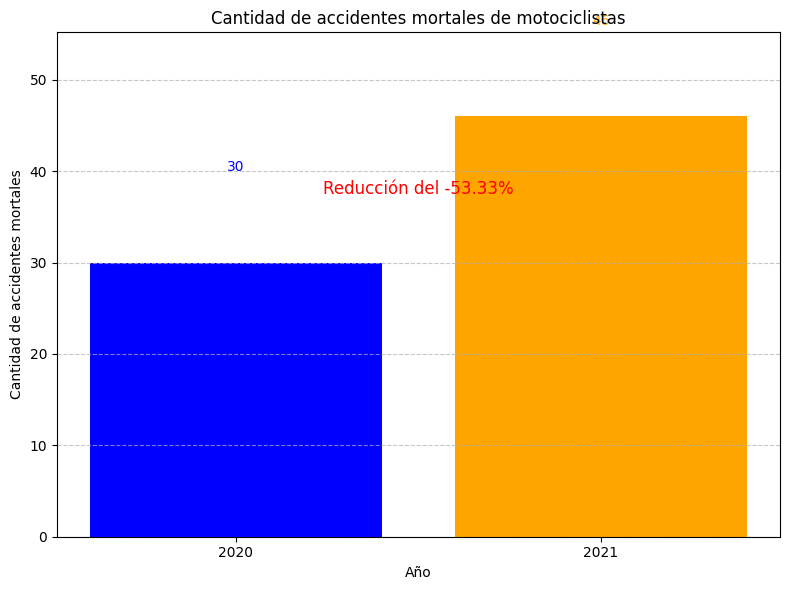

In [24]:
# Calcular la cantidad de accidentes mortales con víctimas en moto en el año anterior (2020)
accidentes_2020 = siniestros_moto[siniestros_moto['Año'] == 2020]['N_VICTIMAS'].sum()

# Calcular la cantidad de accidentes mortales con víctimas en moto en el último año (2021)
accidentes_2021 = siniestros_moto[siniestros_moto['Año'] == 2021]['N_VICTIMAS'].sum()

# Calcular el porcentaje de reducción
porcentaje_reduccion = ((accidentes_2020 - accidentes_2021) / accidentes_2020) * 100

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['2020', '2021'], [accidentes_2020, accidentes_2021], color=['blue', 'orange'])
plt.title('Cantidad de accidentes mortales de motociclistas')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes mortales')
plt.text(0, accidentes_2020 + 10, f'{accidentes_2020}', ha='center', color='blue')
plt.text(1, accidentes_2021 + 10, f'{accidentes_2021}', ha='center', color='orange')
plt.ylim(0, max(accidentes_2020, accidentes_2021) * 1.2)  # Ajustar límites del eje y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Añadir porcentaje de reducción
plt.text(0.5, (accidentes_2020 + accidentes_2021) / 2, f'Reducción del {porcentaje_reduccion:.2f}%', ha='center', va='center', fontsize=12, color='red')

plt.show()

Este análisis, indica que se debe trabajar fuertemente en concientización y seguridad vial en CABA en cuanto a accidentes que involucren motocicletas. Por ejemplo:
* Campañas de concientización para motociclistas: Con expertos en el área, sobre el uso adecuado del casco y las medidas preventivas necesarias.
* Corroborar y mejorar la infraestructura de los sitios con más accidentes.
* Reforzar la aplicación de la ley, implementando controles y penas más estrictas.
* Promover el uso del transporte público, que como vimos en el gráfico anterior, tiene uno de los porcentajes más bajos de siniestros viales.

Para ahondar más en el problema, me gustaría continuar con el análisis centrandome en las motos. Vamos a ver dónde se dan estos siniestros para entender el problema geolocalizadamente.

In [25]:
# Agrupar por comuna y sumar las víctimas que manejaban moto
victimas_por_comuna = df_siniestros_viales[df_siniestros_viales['VICTIMA'] == 'MOTO'].groupby('COMUNA')['N_VICTIMAS'].sum()

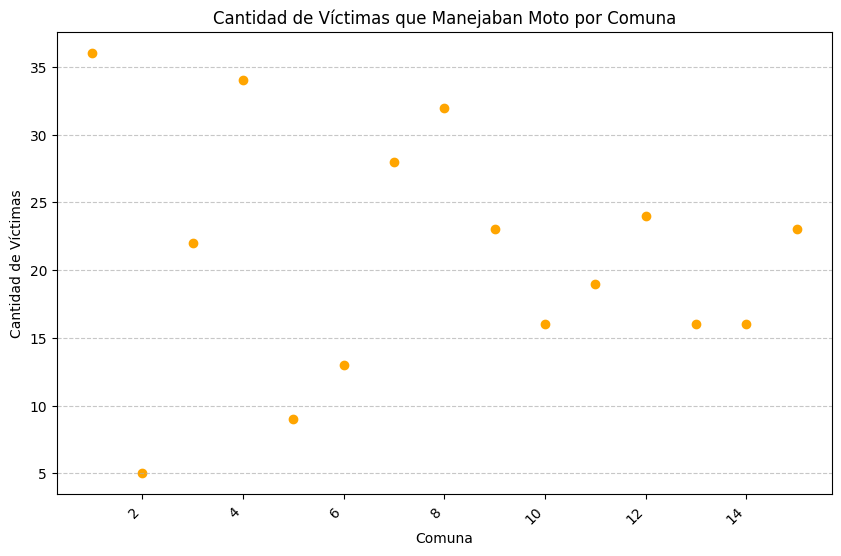

In [27]:
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(victimas_por_comuna.index, victimas_por_comuna.values, color='orange')
plt.title('Cantidad de Víctimas que Manejaban Moto por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Con este gráfico, podemos entender cuales son las comunas con más siniestros por MOTO en CABA. Veamos en un mapa:

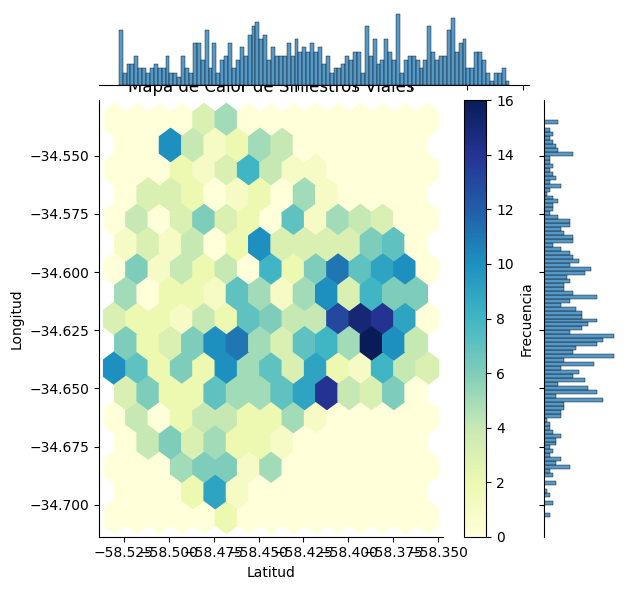

In [34]:
# Convertir las columnas 'pos x' y 'pos y' a tipo numérico
df_siniestros_viales['pos x'] = pd.to_numeric(df_siniestros_viales['pos x'], errors='coerce')
df_siniestros_viales['pos y'] = pd.to_numeric(df_siniestros_viales['pos y'], errors='coerce')

# Eliminar filas con valores NaN en 'pos x' o 'pos y'
df_siniestros_viales.dropna(subset=['pos x', 'pos y'], inplace=True)

# Crear el mapa de calor con jointplot
sns.jointplot(
    x='pos x',  # Coordenadas de latitud
    y='pos y',  # Coordenadas de longitud
    data=df_siniestros_viales,
    kind='hex',  # Usar hexbin para visualizar la densidad
    cmap='YlGnBu',  # Colormap
    marginal_kws=dict(bins=100, fill=True)  # Configuración de los bins
)

# Configurar el título y etiquetas de los ejes
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Mapa de Calor de Siniestros Viales')

# Mostrar el mapa de calor
plt.colorbar(label='Frecuencia')
plt.show()

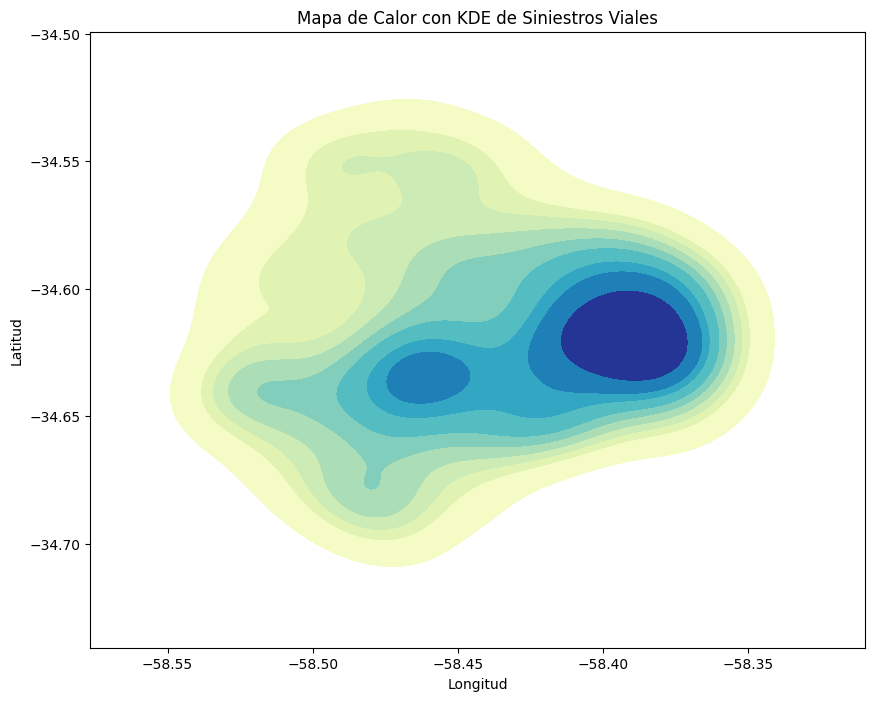

In [37]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_siniestros_viales['pos x'], y=df_siniestros_viales['pos y'], cmap='YlGnBu', fill=True)
plt.title('Mapa de Calor con KDE de Siniestros Viales')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Si comparamos estos mapas de calor, con el mapa de comunas en CABA, podemos ver cuales son las zonas con más siniestros viales por accidentes de MOTOS.

![Logo de OpenAI](Imagenes\comunas.jpg)


In [ ]:
# Convertir las columnas 'pos_x' y 'pos_y' a tipo float para representar las coordenadas en el mapa
df_siniestros_viales['pos x'] = pd.to_numeric(df_siniestros_viales['pos x'], errors='coerce')
df_siniestros_viales['pos y'] = pd.to_numeric(df_siniestros_viales['pos y'], errors='coerce')

In [41]:
from shapely.geometry import Point
import geopandas as gpd

In [42]:
# Convertí las coordenadas en geometrías de puntos
df_siniestros_viales['pos x'] = df_siniestros_viales['pos x'].astype(float)
df_siniestros_viales['pos y'] = df_siniestros_viales['pos y'].astype(float)

# Cree geometrías de puntos a partir de las coordenadas
geometry = [Point(x, y) for x, y in zip(df_siniestros_viales['pos x'], df_siniestros_viales['pos y'])]

# Cree un GeoDataFrame con las geometrías de puntos
gdf = gpd.GeoDataFrame(df_siniestros_viales, geometry=geometry)

C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1487916159.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1487916159.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1487916159.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\loren\AppData\Local\Temp\ipykernel_14616\1487916159.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS befor

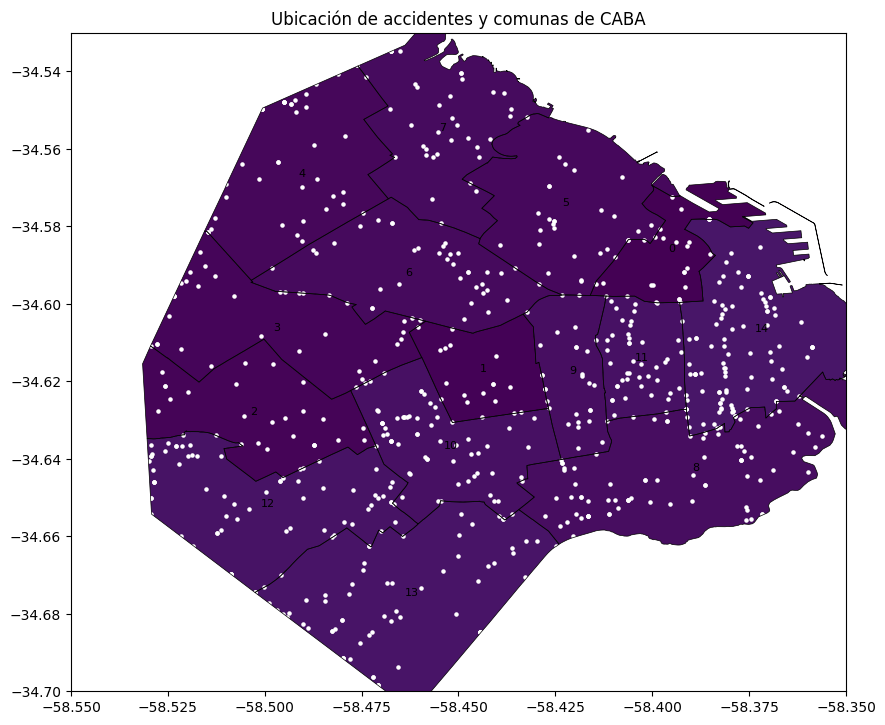

In [43]:
# Cargue los datos de las comunas de CABA
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.geojson"
comunas = gpd.read_file(url)

# Asignar un color a cada comuna utilizando la paleta viridis
num_comunas = len(comunas)
colores_comunas = plt.cm.viridis(range(num_comunas))

# Crear el mapa base de CABA
fig, ax = plt.subplots(figsize=(10, 10))
comunas.boundary.plot(ax=ax, color='black', linewidth=0.5)  # Enmarcar las comunas

# Graficar los polígonos de cada comuna con un color diferente
for i in range(num_comunas):
    comunas[comunas.index == i].plot(ax=ax, color=colores_comunas[i])
    # Obtener el centroide de la comuna y agregar el número de comuna como texto
    centroid = comunas[comunas.index == i].geometry.centroid.values[0]
    ax.text(centroid.x, centroid.y, str(i), fontsize=8, ha='center', va='center')

# Añadir los puntos blancos
gdf.plot(ax=ax, color='white', markersize=5)

# Ajustar los límites del mapa para centrarse en CABA
ax.set_xlim([-58.55, -58.35])  # Ajustar los límites longitudinales
ax.set_ylim([-34.70, -34.53])  # Ajustar los límites latitudinales

# Añadir título y leyenda
plt.title('Ubicación de accidentes y comunas de CABA')

# Mostrar el mapa
plt.show()

En esta representación gráfica, se pueden apreciar las ubicaciones geográficas de los siniestros viales, sin embargo, los números en las comunas son incorrectos. Por ello, adjunté un mapa con los números de las comunas anteriormente.

Para finalizar el análisis exploratorio de datos, voy a graficar dos datos que me parecen de suma importancia. Los tipos de calle donde se produjeron estos siniestros.

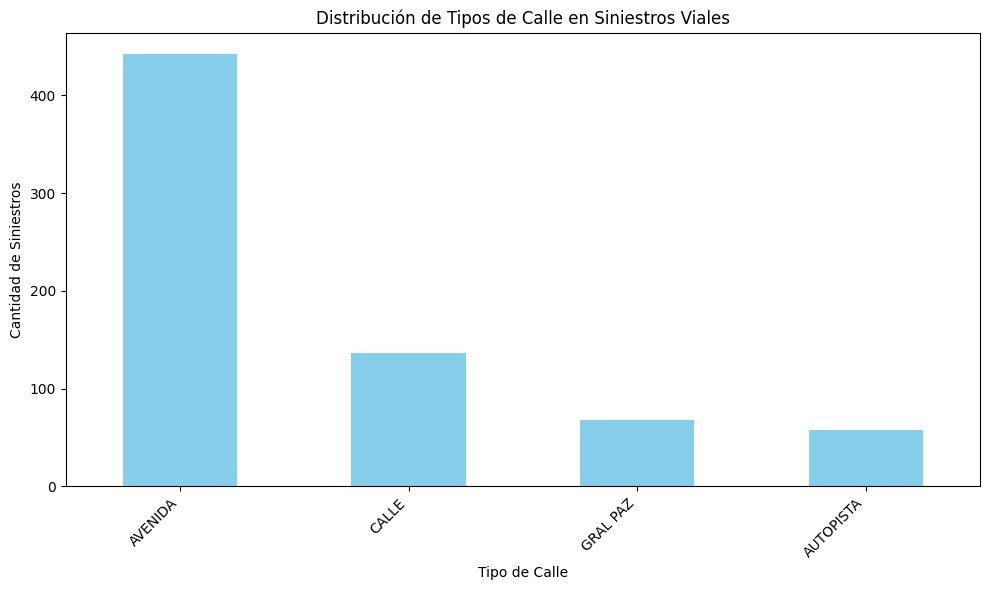

In [44]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
df_siniestros_viales['TIPO_DE_CALLE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Calle en Siniestros Viales')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Por mucha diferencia, podemos notar que la gran mayoría de siniestros viales en las comunas de CABA ocurren en avenidas. Con esta información ya analizada, podemos saber con datos certeros todo lo siguiente:
* En CABA, los siniestros viales representan al rededor del 5% de la tasa de homicidios sobre la población total.
* Los hombres representan más del 70% de las víctimas fatales en siniestros viales.
* Los rangos etáreos con más accidentes son los jóvenes entre 19 y 40 años. Y los jubilados de más de 60.
* El vehículo con más víctimas fatales es la moto. 
* Las comunas con más víctimas fatales son la 1, la 4 y la 8.
* El tipo de calle donde ocurren más siniestros son las avenidas.

                                                Tercer KPI                                                       

Para finalizar, quiero graficar el tercer y último KPI, en el cual muestro cómo el año 2021 tuvo una reducción en su cantidad de siniestros viales sobre autopistas frente al año 2020

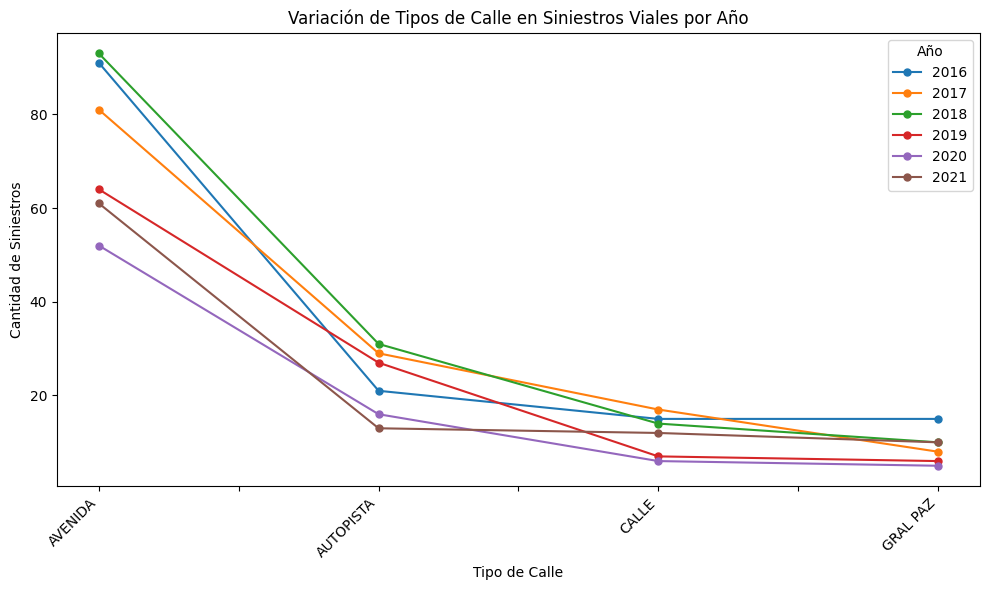

In [46]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
for year in df_siniestros_viales['Año'].unique():
    data_year = df_siniestros_viales[df_siniestros_viales['Año'] == year]
    data_year['TIPO_DE_CALLE'].value_counts().plot(kind='line', marker='o', markersize=5, label=str(year))

plt.title('Variación de Tipos de Calle en Siniestros Viales por Año')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año')
plt.tight_layout()
plt.show()


                                     Guardamos todos nuestros Dataframes para llevar a Streamlit                  

In [53]:
# Guardamos el Dataframe más grande actualizado.
df_siniestros_viales.to_csv('df_siniestros_viales_streamlit.csv', index=False)

# Guardamos el Dataframe con la cantidad de siniestros por año por comuna.
df_siniestros_comunas.to_csv('df_siniestros_comunas.csv', index=False)

# Guardamos el Dataframe con la cantidad de siniestros por año por mes.
df_final.to_csv('df_siniestros_anios.csv', index=False)